## **Henry Van Herk**

Read in files from Google Drive into dataframes 

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'1CUJDQXTTxEc5gbsnrbcZt_dqApSomxFR'}) # replace the id with id of file you want to access
downloaded.GetContentFile('application_train_prepared.csv')  

downloaded = drive.CreateFile({'id':'1-NZCFH5f48-y_QwjXWLWBVuqcJg_7hCO'}) # replace the id with id of file you want to access
downloaded.GetContentFile('application_test_from_train_prepared.csv')  

downloaded = drive.CreateFile({'id':'1-89GnL2WIWa3X2cEGYlsc18Z-iQmnZjt'}) # replace the id with id of file you want to access
downloaded.GetContentFile('bureau_prepared.csv')  

downloaded = drive.CreateFile({'id':'1-9tuV70XbvdXH8oVEXzrA2-k9oRXj9Tq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('previous_applications_prepared.csv')

downloaded = drive.CreateFile({'id':'1-I-HzXySHedfrOkwBeDm6dZxq6cFI9fj'}) # replace the id with id of file you want to access
downloaded.GetContentFile('credit_card_prepared.csv')

downloaded = drive.CreateFile({'id':'1-9gkT-AjVs36QIwUULVFuuD96i-dsEBb'}) # replace the id with id of file you want to access
downloaded.GetContentFile('featureMatrix_prepared_TRAIN.csv')

downloaded = drive.CreateFile({'id':'1-9nRSFbQXg42mDFDIYAwBBeQ3HmxrdGo'}) # replace the id with id of file you want to access
downloaded.GetContentFile('featureMatrix_prepared_TEST.csv')

downloaded = drive.CreateFile({'id':'1-4DH3421cF2RX0sZ-fRS0nw3EPOQGBeu'}) # replace the id with id of file you want to access
downloaded.GetContentFile('featureMatrix_prepared.csv')

#3. Read file as panda dataframe
import pandas as pd
df = pd.read_csv('application_train_prepared.csv')
dft = pd.read_csv('application_test_from_train_prepared.csv')
bu = pd.read_csv('bureau_prepared.csv')
pa = pd.read_csv('previous_applications_prepared.csv')
cc = pd.read_csv('credit_card_prepared.csv')
fmTest =  pd.read_csv('featureMatrix_prepared_TEST.csv', index_col='SK_ID_CURR')
fmTrain =  pd.read_csv('featureMatrix_prepared_TRAIN.csv', index_col='SK_ID_CURR')
fm = pd.read_csv('featureMatrix_prepared.csv', index_col='SK_ID_CURR')

Data Cleaning Suggestions (Not used in final project)

In [0]:
del df['REGION_RATING_CLIENT'] # Removing the REGION_RATING_CLIENT column from the dataframe, redundent with REGION_RATING_W_CITY which provides more information
del dft['REGION_RATING_CLIENT']

df.EXT_SOURCE_1 = (df.EXT_SOURCE_1+df.EXT_SOURCE_2+df.EXT_SOURCE_3)/3 # Making EXT_SOURCE_1 the average of EXT_SOURCE_1, EXT_SOURCE_2 and EXT_SOURCE_3
del df['EXT_SOURCE_2'] # Removing the EXT_SOURCE_2 column from the dataframe


dft.EXT_SOURCE_1 = (dft.EXT_SOURCE_1+dft.EXT_SOURCE_2+dft.EXT_SOURCE_3)/3
del dft['EXT_SOURCE_2']
del dft['EXT_SOURCE_3']

cashLoansTrain = df[df.NAME_CONTRACT_TYPE != 'Revolving loans'] # New dataframe with only Cash loans as the NAME_CONTRACT_TYPE
revolvingLoansTrain = df[df.NAME_CONTRACT_TYPE != 'Cash loans'] # New dataframe with only Cash loans as the NAME_CONTRACT_TYPE

cashLoansTest = dft[dft.NAME_CONTRACT_TYPE != 'Revolving loans']
revolvingLoansTest = dft[dft.NAME_CONTRACT_TYPE != 'Cash loans']

Manual Feature Creation

In [0]:
# Loan amount / total income
df["Loan amount / total income"] = df.AMT_CREDIT/df.AMT_INCOME_TOTAL

dft["Loan amount / total income"] = dft.AMT_CREDIT/dft.AMT_INCOME_TOTAL

# Annuity amount /total income
df["Annuity amount / total income"] = df.AMT_ANNUITY*12/df.AMT_INCOME_TOTAL

dft["Annuity amount / total income"] = dft.AMT_ANNUITY*12/dft.AMT_INCOME_TOTAL

# Total debt / total income
a = bu.groupby(['SK_ID_CURR'], as_index=False)['AMT_CREDIT_SUM'].sum()
b = df[['SK_ID_CURR','AMT_CREDIT']]
c = df[['SK_ID_CURR','AMT_INCOME_TOTAL']]
abc = a.merge(b, on='SK_ID_CURR', how='outer').merge(c, on='SK_ID_CURR', how='outer')
df["Total debt / total income"] = (abc['AMT_CREDIT_SUM'] + abc['AMT_CREDIT']) / abc['AMT_INCOME_TOTAL']

b2 = dft[['SK_ID_CURR','AMT_CREDIT']]
c2 = dft[['SK_ID_CURR','AMT_INCOME_TOTAL']]
abc2 = a.merge(b2, on='SK_ID_CURR', how='outer').merge(c2, on='SK_ID_CURR', how='outer')
dft["Total debt / total income"] = (abc2['AMT_CREDIT_SUM'] + abc2['AMT_CREDIT']) / abc2['AMT_INCOME_TOTAL']

# Loan / total goods price
df["Loan / total goods price"] = df.AMT_CREDIT/df.AMT_GOODS_PRICE

dft["Loan / total goods price"] = dft.AMT_CREDIT/dft.AMT_GOODS_PRICE

# Total external credit limits
x = bu.groupby(['SK_ID_CURR'], as_index=False)['AMT_CREDIT_SUM'].sum()
df["Total external credit limits"] = x['AMT_CREDIT_SUM']

dft["Total external credit limits"] = x['AMT_CREDIT_SUM']

# Current yearly payment pre
y = bu.groupby(['SK_ID_CURR'], as_index=False)['AMT_ANNUITY'].sum()
df["Current yearly payment pre"] = y['AMT_ANNUITY']

dft["Current yearly payment pre"] = y['AMT_ANNUITY']

# Growth in loan size (sparse) (0 if microfinance) over previous loan
df["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = pa.AMT_CREDIT/df.AMT_CREDIT

dft["Growth in loan size (sparse) (0 if microfinance) over previous loan"] = pa.AMT_CREDIT/dft.AMT_CREDIT

# Important Income - yearly credit payments (free cash flow)
l = bu.groupby(['SK_ID_CURR'], as_index=False)['AMT_ANNUITY'].sum()
m = df[['SK_ID_CURR','AMT_INCOME_TOTAL']]
n = cc[['SK_ID_CURR','AMT_BALANCE']]
lmn = l.merge(m, on='SK_ID_CURR', how='outer').merge(n, on='SK_ID_CURR', how='outer')
df["Important Income - yearly credit payments (free cash flow)"] = (lmn['AMT_INCOME_TOTAL']) - ((lmn['AMT_BALANCE'] + lmn['AMT_ANNUITY'])*12)/lmn['AMT_INCOME_TOTAL']

m2 = df[['SK_ID_CURR','AMT_INCOME_TOTAL']]
lmn2 = l.merge(m2, on='SK_ID_CURR', how='outer').merge(n, on='SK_ID_CURR', how='outer')
dft["Important Income - yearly credit payments (free cash flow)"] = (lmn2['AMT_INCOME_TOTAL']) - ((lmn2['AMT_BALANCE'] + lmn2['AMT_ANNUITY'])*12)/lmn2['AMT_INCOME_TOTAL']

# Years to pay back loan
df["Years to pay back loan"] = df.AMT_CREDIT/(df.AMT_ANNUITY*12)

dft["Years to pay back loan"] = dft.AMT_CREDIT/(dft.AMT_ANNUITY*12)

Feature Creation Testing

In [0]:
# Training set

#print(df["Loan amount / total income"].head(20))
#print(df["Annuity amount / total income"].head(20))
#print(df["Total debt / total income"].head(20))
#print(df["Loan / total goods price"].head(20))
#print(df["Total external credit limits"].head(20))
#print(df["Current yearly payment pre"].head(20))
#print(df["Growth in loan size (sparse) (0 if microfinance) over previous loan"].head(20))
#print(df["Important Income - yearly credit payments (free cash flow)"].head(20))
#print(df["Years to pay back loan"].head(20))

# Test set

#print(dft["Loan amount / total income"].head(20))
#print(dft["Annuity amount / total income"].head(20))
#print(dft["Total debt / total income"].head(20))
#print(dft["Loan / total goods price"].head(20))
#print(dft["Total external credit limits"].head(20))
#print(dft["Current yearly payment pre"].head(20))
#print(dft["Growth in loan size (sparse) (0 if microfinance) over previous loan"].head(20))
#print(dft["Important Income - yearly credit payments (free cash flow)"].head(20))
#print(dft["Years to pay back loan"].head(20))

Logistic Regression

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [0]:
targetTrain = fmTrain.pop("TARGET")
target = df.pop("TARGET")

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, targetTrain, test_size = .3, random_state=25)

In [0]:
classifier = LogisticRegression(C = 0.0001)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
log_reg_pred = classifier.predict_proba(X_test)[:, 1]

In [0]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8496    9]
 [ 720    1]]


In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.92


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      8505
         1.0       0.10      0.00      0.00       721

   micro avg       0.92      0.92      0.92      9226
   macro avg       0.51      0.50      0.48      9226
weighted avg       0.86      0.92      0.88      9226



XGBoost

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier

import pandas as pd

import numpy as np
from numpy import loadtxt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')


# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline

In [0]:
targetTrain = fmTrain.pop('TARGET')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, targetTrain, test_size=0.2, random_state=123)

In [0]:
model = XGBClassifier()
model.fit(X_train, y_train, eval_metric="auc")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
dt = xgb.DMatrix(X_train.as_matrix(),label=y_train.as_matrix())
dv = xgb.DMatrix(X_test.as_matrix(),label=y_test.as_matrix())

params = {
    "eta": 0.2,
    "max_depth": 4,
    "objective": "binary:logistic",
    "silent": 1,
    "base_score": np.mean(y_train),
    'n_estimators': 1000,
    "eval_metric": "auc"
}

model = xgb.train(params, dt, 3000, [(dt, "train"),(dv, "valid")], verbose_eval=200)

[0]	train-auc:0.716896	valid-auc:0.688759
[200]	train-auc:0.949108	valid-auc:0.724678
[400]	train-auc:0.988641	valid-auc:0.714619
[600]	train-auc:0.998236	valid-auc:0.705363
[800]	train-auc:0.999759	valid-auc:0.701472
[1000]	train-auc:0.999989	valid-auc:0.695032
[1200]	train-auc:1	valid-auc:0.693104
[1400]	train-auc:1	valid-auc:0.693832
[1600]	train-auc:1	valid-auc:0.692402
[1800]	train-auc:1	valid-auc:0.692005
[2000]	train-auc:1	valid-auc:0.69126
[2200]	train-auc:1	valid-auc:0.69121
[2400]	train-auc:1	valid-auc:0.690203
[2600]	train-auc:1	valid-auc:0.687798
[2800]	train-auc:1	valid-auc:0.686961
[2999]	train-auc:1	valid-auc:0.686454


In [0]:
rcParams['figure.figsize'] = 30,30
#plot_tree(model, num_trees=2999, rankdir='LR')

In [0]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]

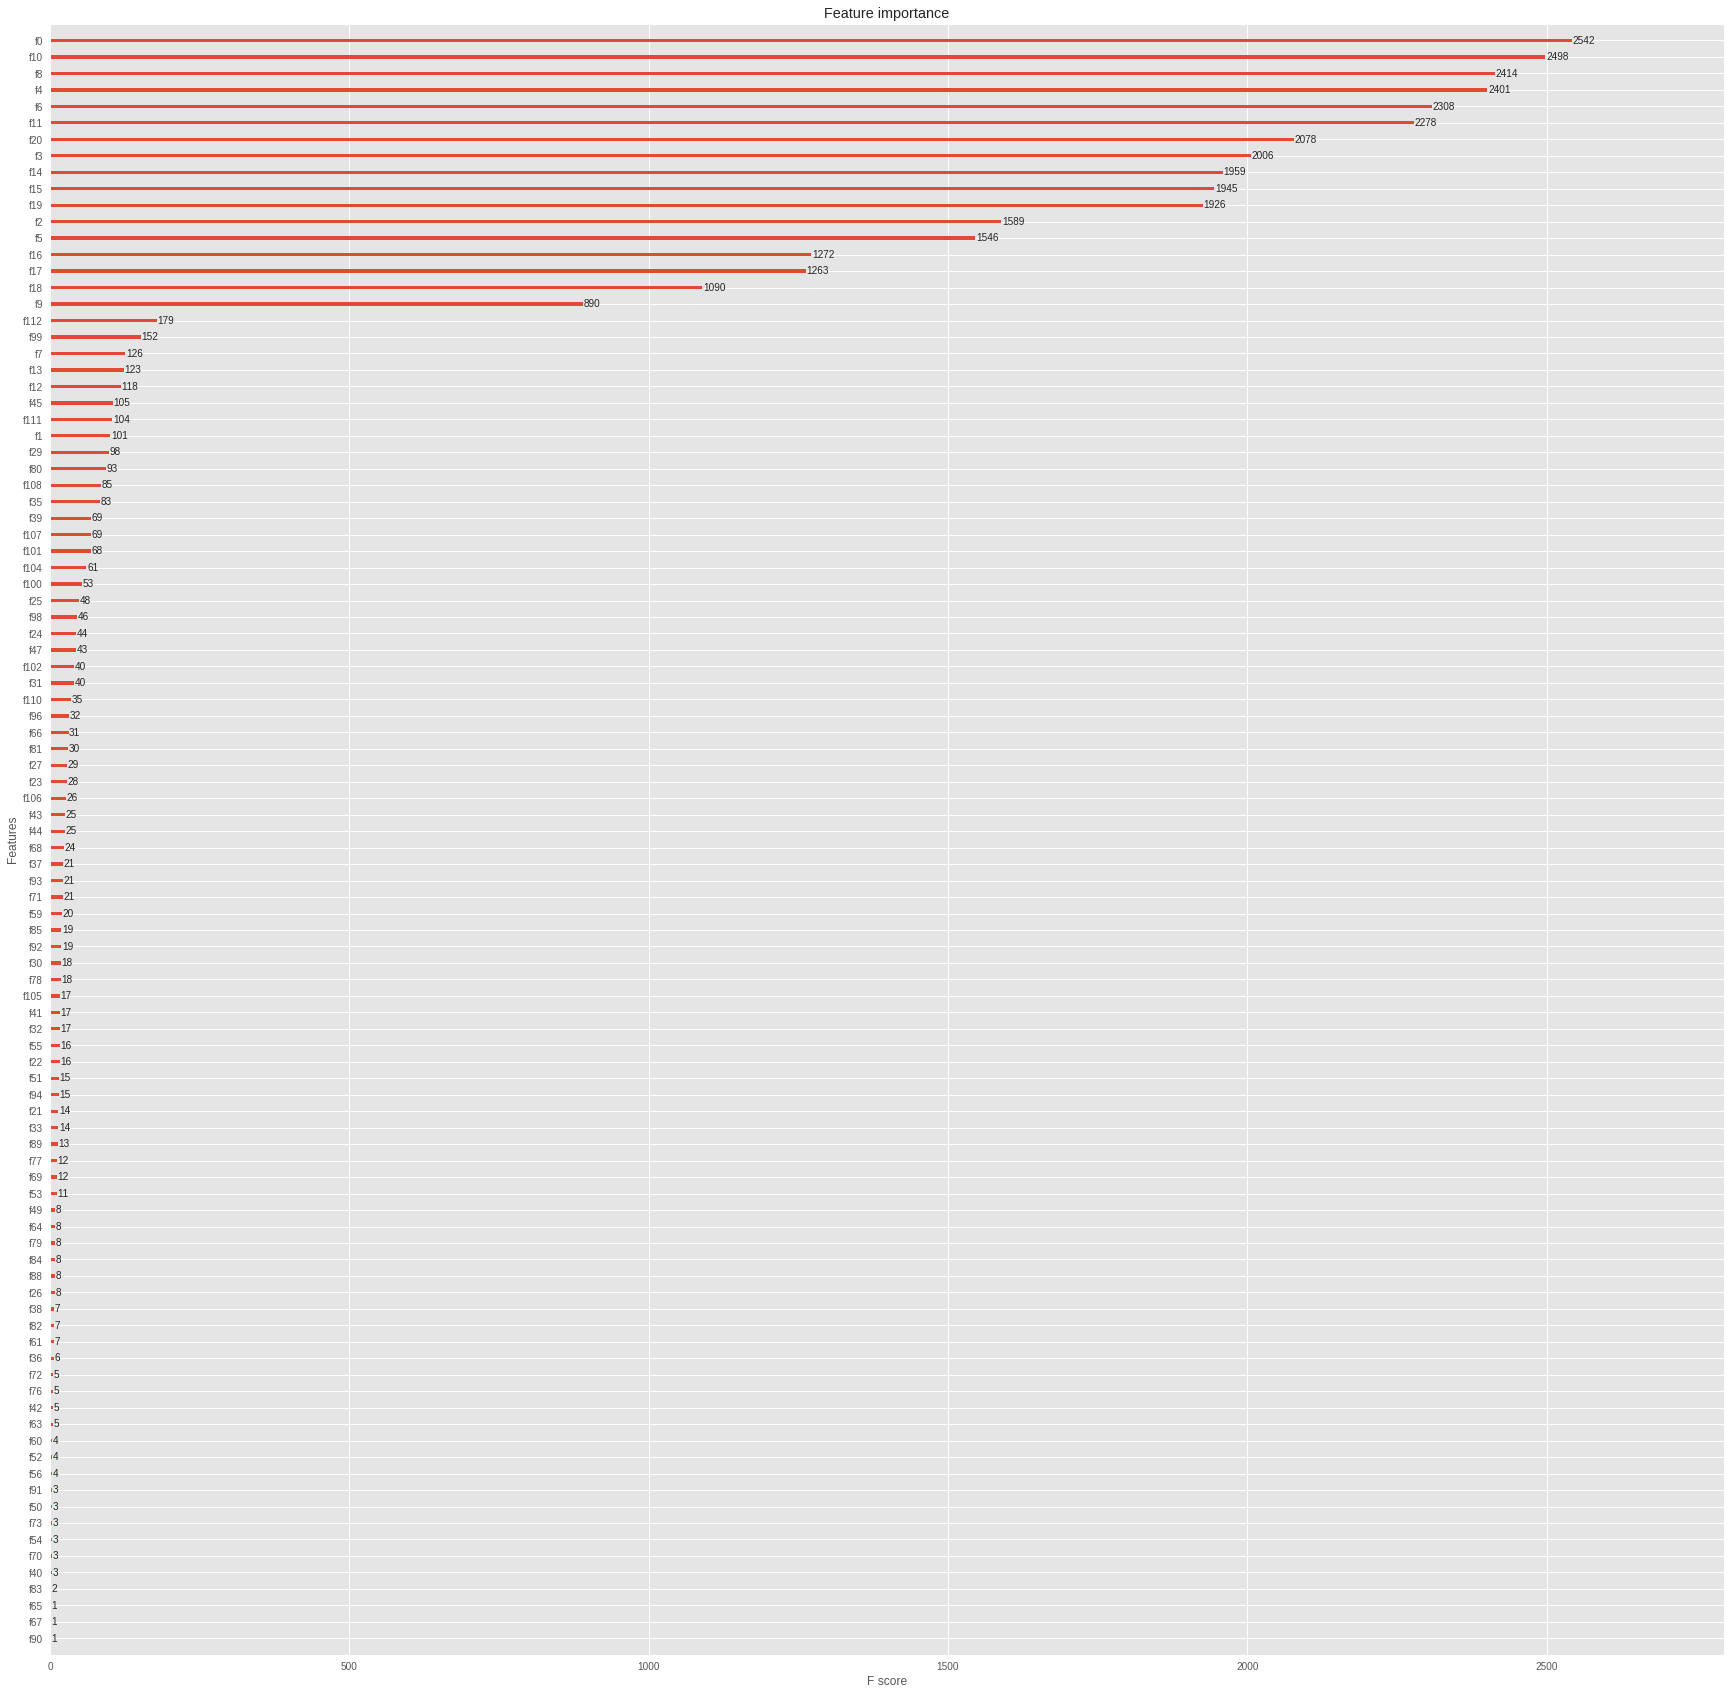

In [0]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot') 
xgb.plot_importance(model) 

In [0]:
df.head()

,SK_ID_CURR,FLAG_DOCUMENT_3,FLOORSMIN_AVG,OWN_CAR_AGE,EXT_SOURCE_1,FLOORSMAX_AVG,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,CODE_GENDER_F,CODE_GENDER_M,TARGET
0,100002,True,0.125000,14.635930,0.083037,0.083300,0.139376,2.0,0.262949,351000.0,...,0,0,1,0,0,0,1,0,1,True
1,100003,True,0.333300,9.954078,0.311267,0.291700,0.435235,0.0,0.622246,1129500.0,...,0,0,0,0,0,1,0,1,0,False
2,100004,False,0.163025,26.000000,0.635005,0.175773,0.729567,0.0,0.555912,135000.0,...,0,0,1,0,0,0,1,0,1,False
3,100006,True,0.168868,13.254353,0.647556,0.180762,0.548509,0.0,0.650442,297000.0,...,0,0,1,0,0,0,1,1,0,False
4,100007,False,0.176795,13.418168,0.612465,0.175770,0.520952,0.0,0.322738,513000.0,...,0,0,1,0,0,0,1,0,1,False


In [0]:
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

AttributeError: ignored

TypeError: ignored

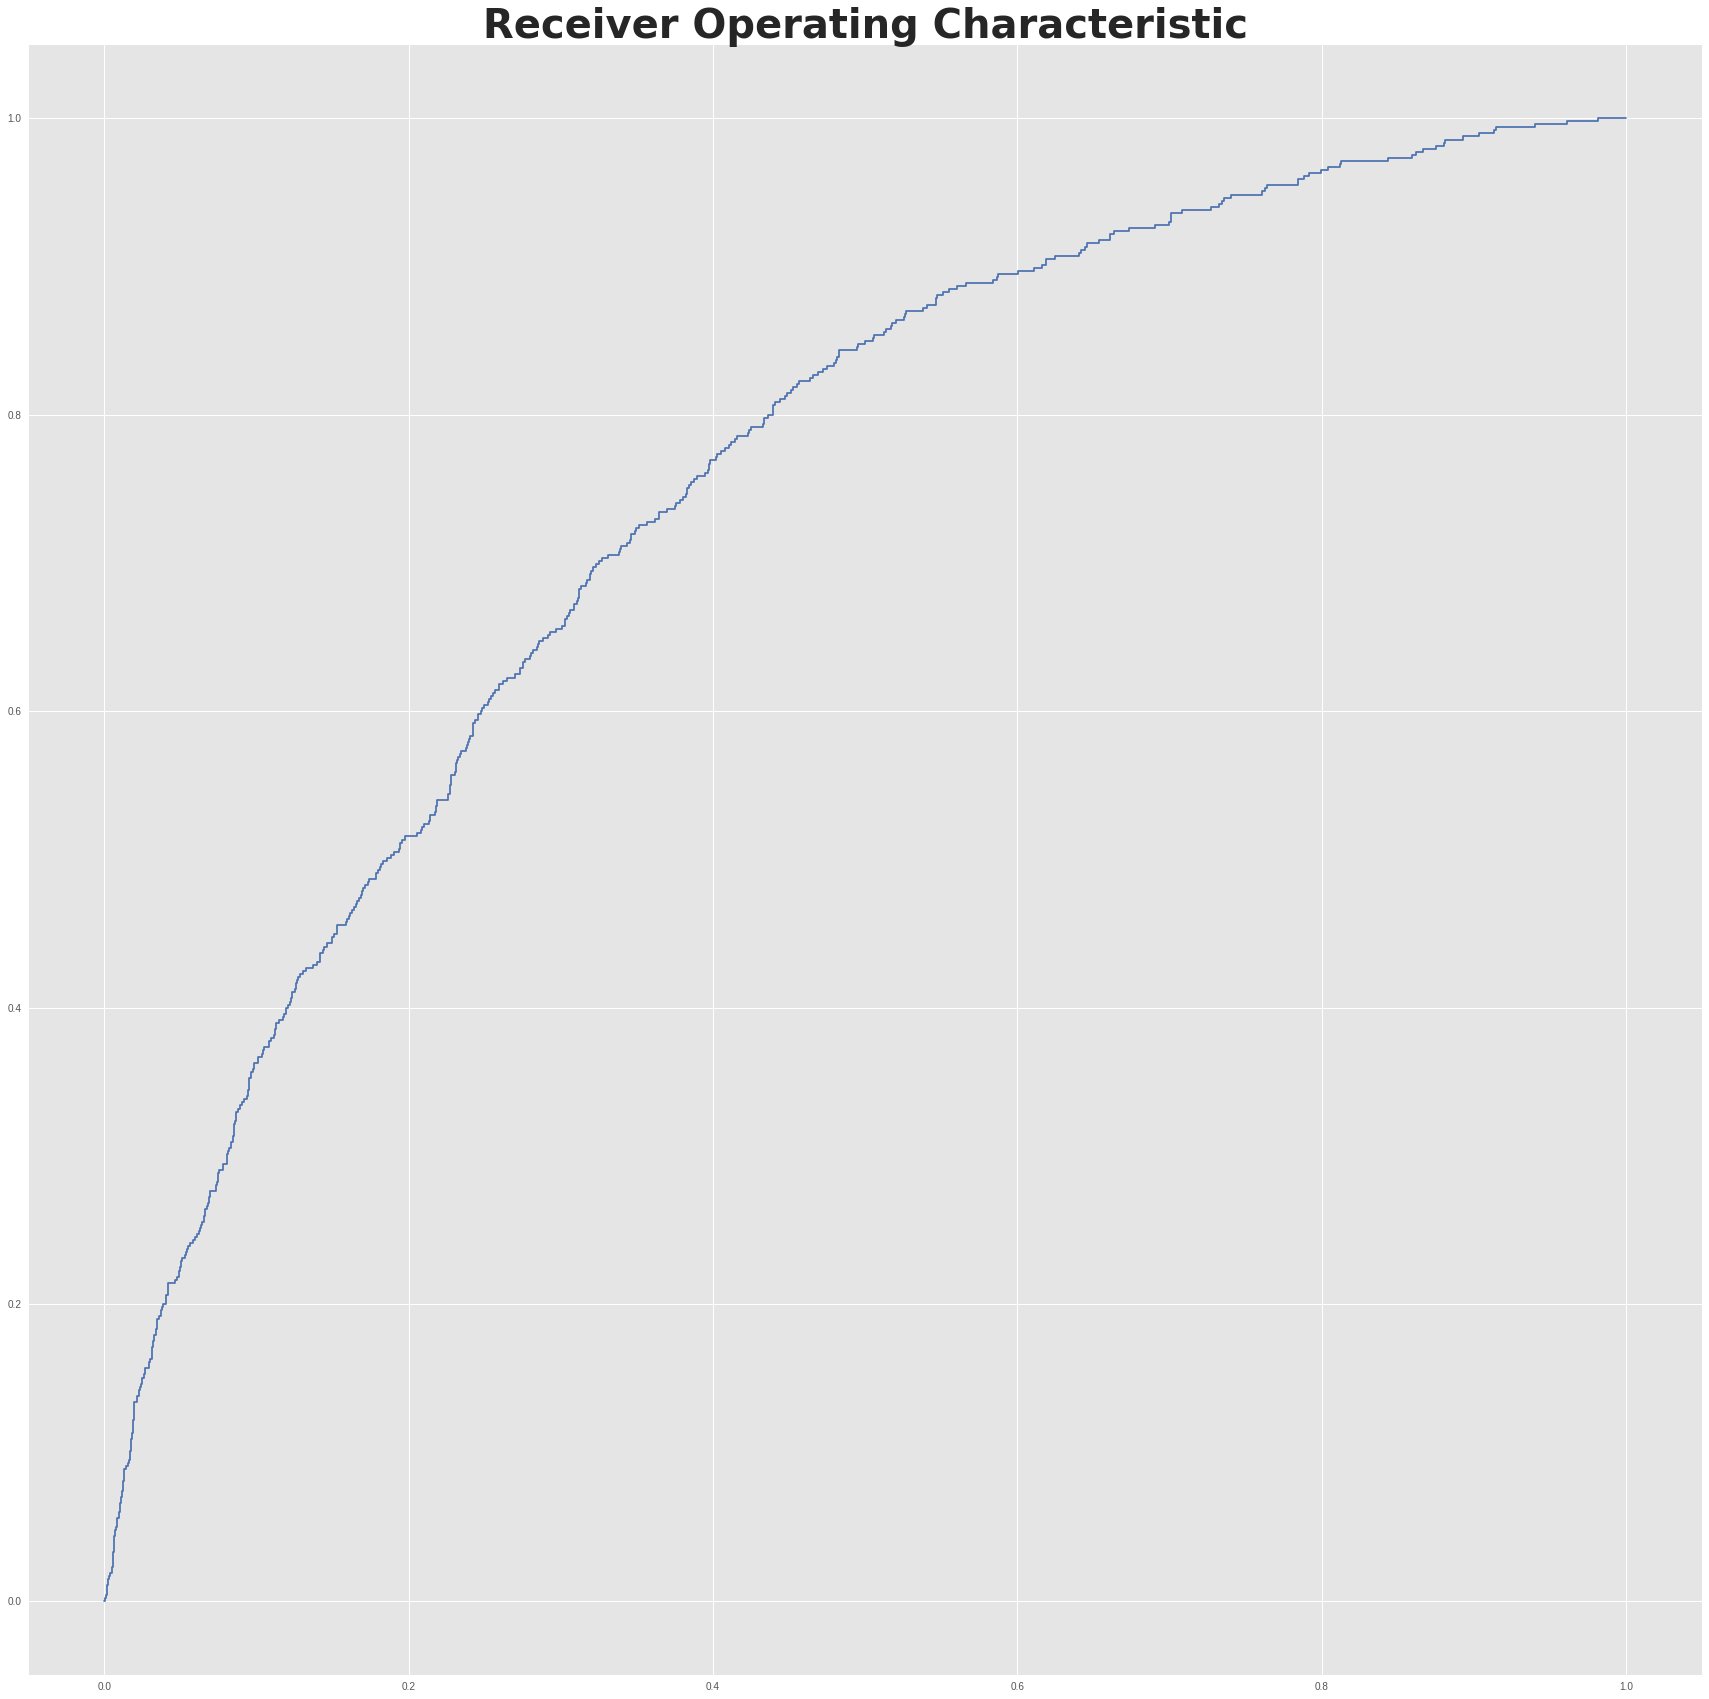

In [0]:
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}
plt.title('Receiver Operating Characteristic', **font)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', **font)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', **font)
plt.xlabel('False Positive Rate', **font)
plt.show()

No handles with labels found to put in legend.


AUC: 0.616


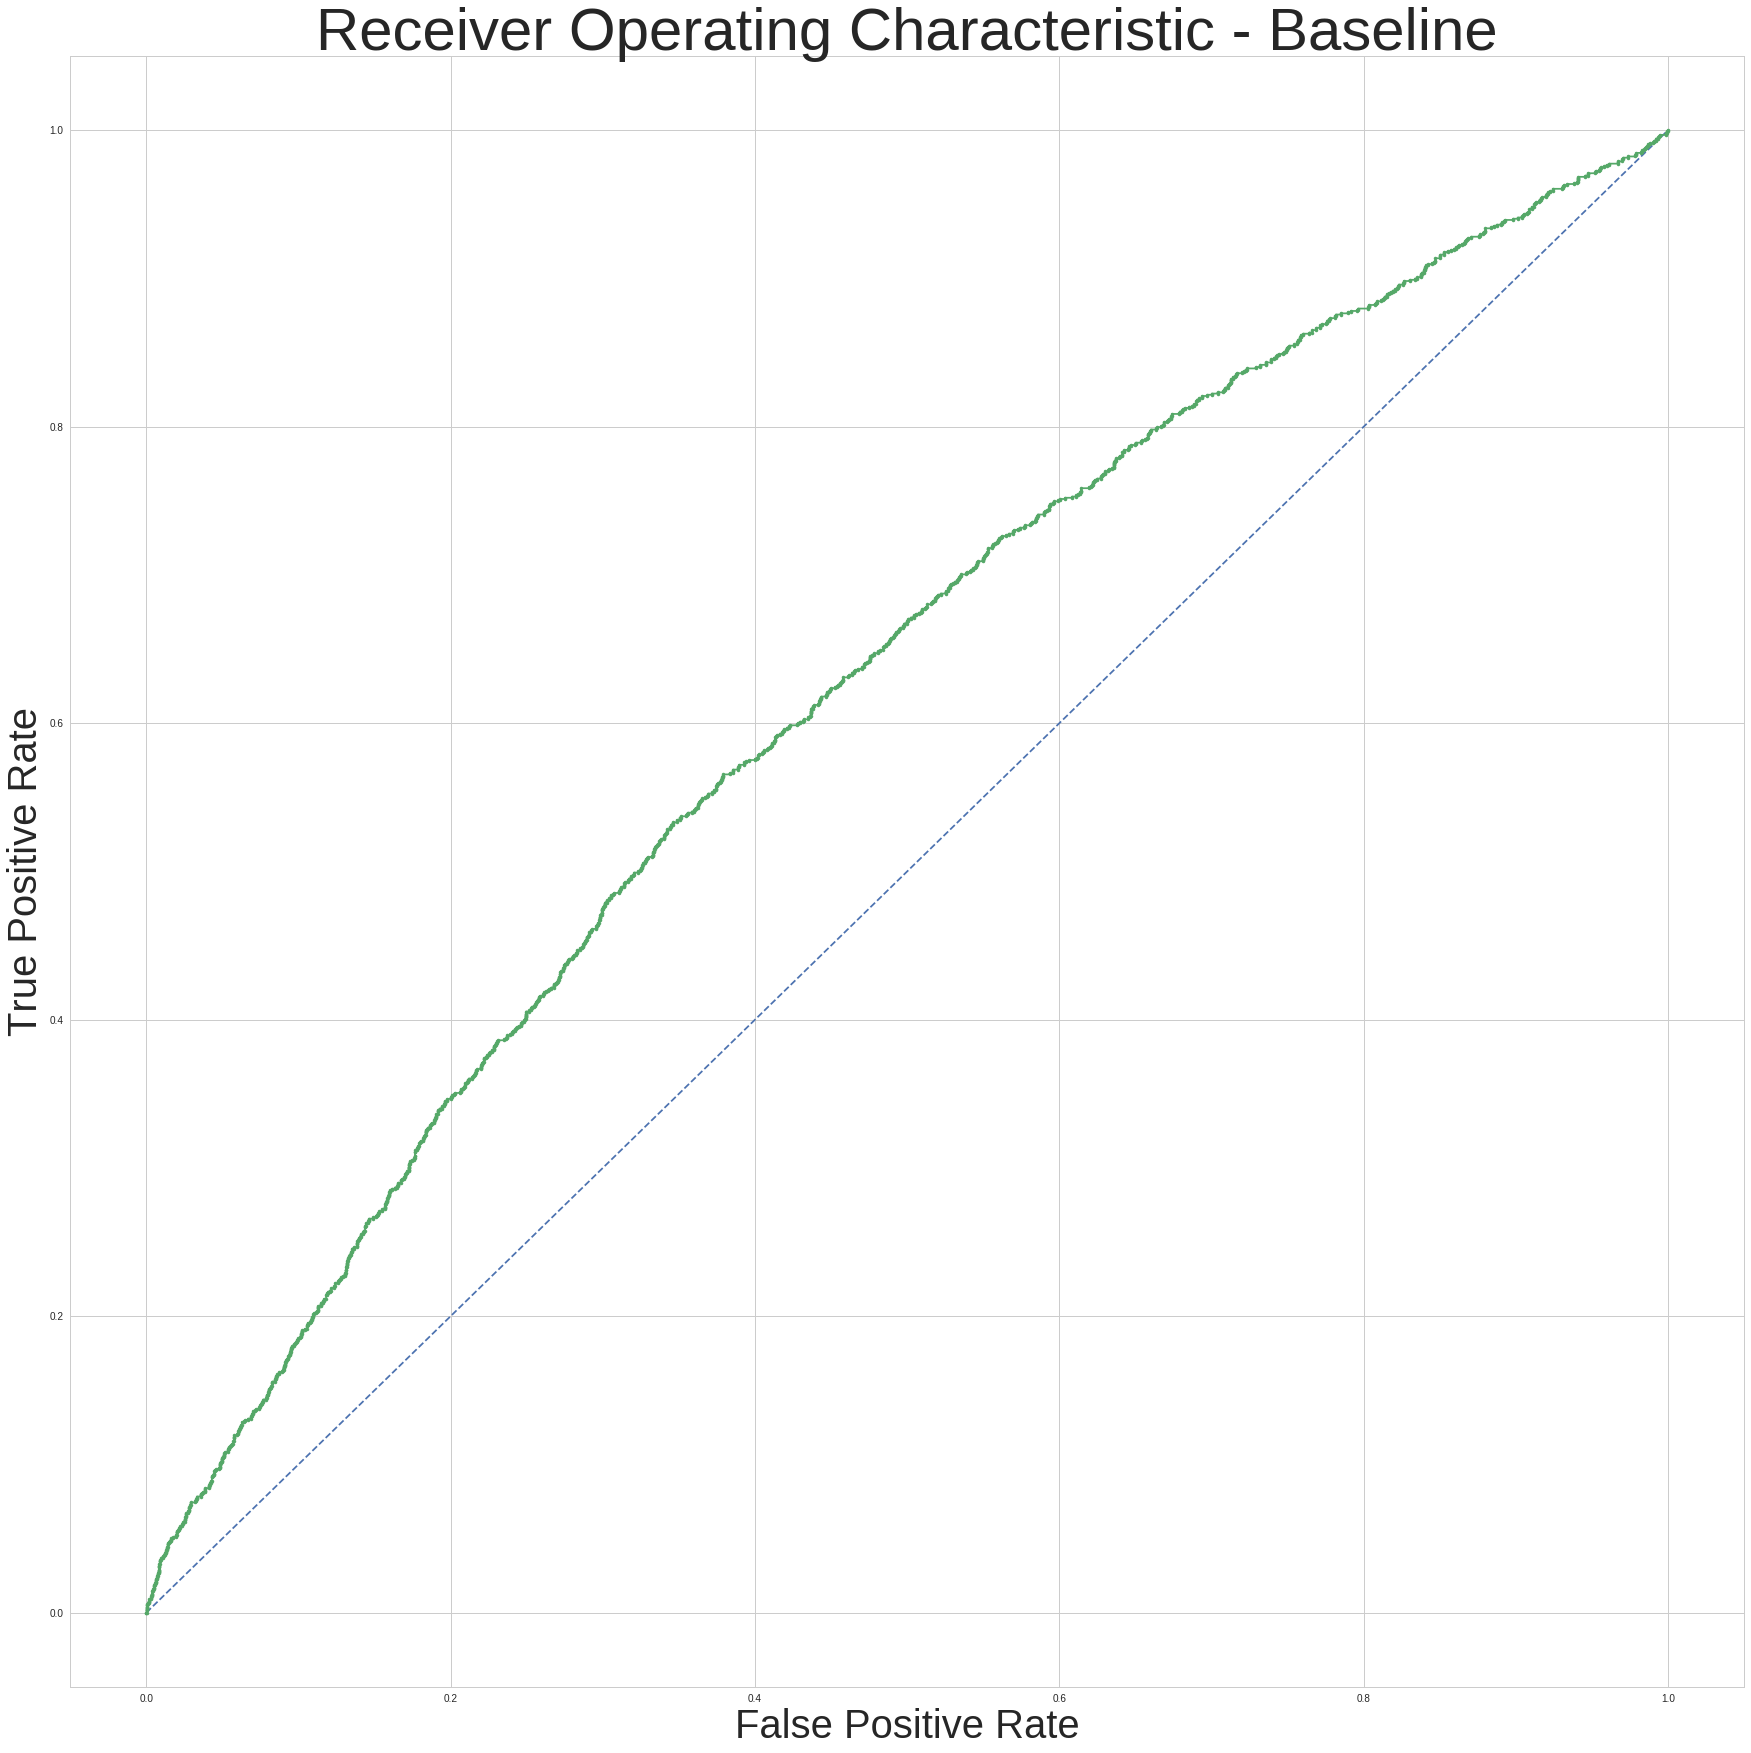

In [0]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(df, targetTrain, test_size=0.5, random_state=2)
# fit a model
#model = KNeighborsClassifier(n_neighbors=3)
#model.fit(trainX, trainy)
#model = XGBClassifier() #XGB
#model.fit(trainX, trainy, eval_metric="auc")
model = LogisticRegression(C = 0.0001) #Logistic Regression
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
plt.title('Receiver Operating Characteristic - Baseline', size = 60)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate', size = 40)
plt.xlabel('False Positive Rate', size = 40)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

import matplotlib.pyplot as plt



In [0]:
#Prediction on validation set
y_pred = model.predict(dv)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, (y_pred>0.5))
print(colored('The Confusion Matrix is: ', 'red'),'\n', cm)
# Calculate the accuracy on test set
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
print(colored('The Accuracy on Test Set is: ', 'blue'), colored(predict_accuracy_on_test_set, 'blue'))

The Confusion Matrix is:  
 [[5603   63]
 [ 459   26]]
The Accuracy on Test Set is:  0.9151357502845066


In [0]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [0]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.95%


Random Forest (not used in final project)

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.921151032352463
